In [2]:
# Initial Imports
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, cast

In [5]:
# Creating engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Reflecting an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# Viewing all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Saving references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Creating our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Inspecting our data
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Finding the most recent date in the data set
most_recent_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date_str[0]

'2017-08-23'

In [12]:
# Designing a query to retrieve the last 12 months of precipitation data and plot the results
# Starting from the most recent data point in the database

# Calculating the date one year from the last date in data set.
most_recent_date = dt.date(2017, 8, 23)
year_ago = most_recent_date - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [13]:
# Performing a query to retrieve the data and precipitation scores
date = Measurement.date
year_of_rain_data = session.query(date, Measurement.prcp)\
.filter(date >= year_ago, date <= most_recent_date).all()
year_of_rain_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:

# Saving the query results as a Pandas DataFrame. Explicitly setting the column names
prcp_levels_db = pd.DataFrame(year_of_rain_data, columns=["Date", "Precipitation"]).dropna()
prcp_levels_db = prcp_levels_db.groupby("Date")["Precipitation"].max().reset_index()

# Sorting the dataframe by date
sorted_prcp_levels_db = prcp_levels_db.sort_values(by="Date")
sorted_prcp_levels_db


,Date,Precipitation
0,2016-08-23,1.79
1,2016-08-24,2.28
2,2016-08-25,0.21
3,2016-08-26,0.04
4,2016-08-27,0.18
...,...,...
361,2017-08-19,0.09
362,2017-08-20,0.01
363,2017-08-21,0.56
364,2017-08-22,0.50


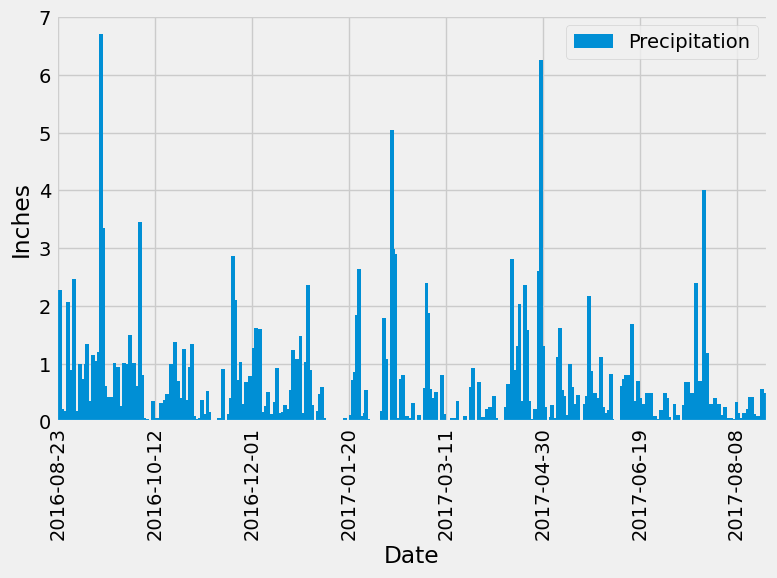

In [15]:
# Using Pandas Plotting with Matplotlib to plot the data
sorted_prcp_levels_db.plot(x="Date", y="Precipitation", kind='bar', figsize=[8, 6], width=2.0)
plt.gca().set_xticks(plt.gca().get_xticks()[::50])
plt.ylabel("Inches")
plt.tight_layout()

plt.show();

In [16]:
# Using Pandas to calculate the summary statistics for the precipitation data
sorted_prcp_levels_db.describe()

,Precipitation
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


# Exploratory Station Analysis

In [17]:
# Inspecting the Data
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [18]:
# Designing a query to calculate the total number of stations in the dataset
num_stations = session.query(Station.station).count()
num_stations

9

In [19]:
# Designing a query to find the most active stations
# Listing the stations and their counts in descending order
station_row = Measurement.station
active_stations = session.query(station_row, func.count(station_row))\
    .group_by(station_row)\
    .order_by(func.count(station_row).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculating the lowest, highest, and average temperature
temperature = Measurement.tobs
most_active_station = active_stations[0][0]

active_station_desc = session.query(func.min(temperature), func.max(temperature), func.avg(temperature)).\
    filter(station_row == most_active_station).all()

active_station_desc

[(54.0, 85.0, 71.66378066378067)]

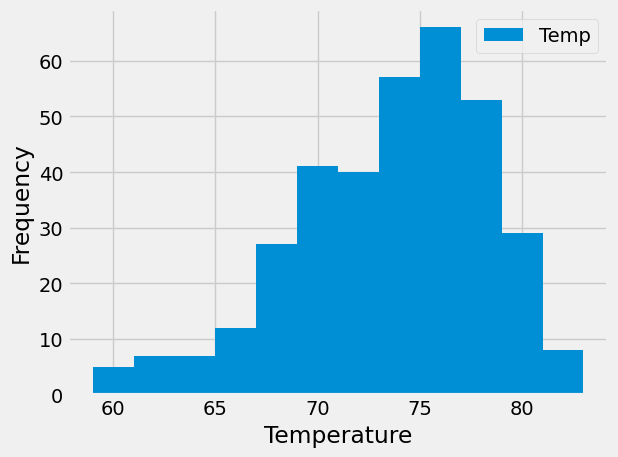

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_of_temp_data = session.query(date, temperature)\
.filter(station_row == most_active_station)\
.filter(date >= year_ago, date <= most_recent_date).all()

temp_levels_db = pd.DataFrame(year_of_temp_data, columns=["Date", "Temp"])
temp_levels_db.plot(kind="hist", bins=12)
plt.xlabel("Temperature")
plt.tight_layout()

plt.show();


# Close Session

In [163]:
# Closing the Session
session.close()